<a href="https://colab.research.google.com/github/Shivam-progate/Organic_farming/blob/Master/Bearing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bearing Project


#### Life cycle of Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

###  Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib and Seaborn Library.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Import the CSV Data as Pandas DataFrame

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

#### Show Top 5 Records

In [ ]:
df.head()

,Stage,Load,Value,Outcome
0,1,0,-0.000387,0
1,1,0,-0.000903,0
2,1,0,0.000130,0
3,1,0,-0.001419,0
4,1,0,-0.001935,0


#### Shape of the dataset

In [ ]:
df.shape

(20965, 4)

###  Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

###  Check Missing values

In [ ]:
df.isna().sum()

Stage      0
Load       0
Value      0
Outcome    0
dtype: int64

 There are no missing values in the data set

 #Check Duplicates

In [ ]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

###  Check data types
#Check Null and Dtypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20965 entries, 0 to 20964
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Stage    20965 non-null  int64  
 1   Load     20965 non-null  int64  
 2   Value    20965 non-null  float64
 3   Outcome  20965 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 655.3 KB


#Checking the number of unique values of each column

In [ ]:
df.nunique()

Stage         3
Load          5
Value      8650
Outcome       3
dtype: int64

#Check statistics of data set

In [ ]:
df.describe()

,Stage,Load,Value,Outcome
count,20965.000000,20965.000000,20965.000000,20965.000000
mean,2.442642,2.019270,-2.798535,1.440496
std,0.499011,1.258594,3.244952,0.501525
min,1.000000,0.000000,-10.558173,0.000000
25%,2.000000,1.000000,-5.033608,1.000000
50%,2.000000,2.000000,-2.299709,1.000000
75%,3.000000,3.000000,-0.441844,2.000000
max,3.000000,4.000000,9.168733,2.000000


#### Insight
- From above description of numerical data, all means are  between -2.79 and 2.44;
- All standard deviations are also close - between 0.49 and 3.24;


#Define numerical & categorical columns

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Stage ', 'Load', 'Value', 'Outcome']

We have 0 categorical features : []


We found 0 categorical features in our dataset


## Model Training

Import Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn Library.

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.5 MB/s eta 0:00:00


In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

#### Preparing X and Y variables

In [ ]:
X = df.drop(columns=['Outcome'],axis=1)
X.head()

,Stage,Load,Value
0,1,0,-0.000387
1,1,0,-0.000903
2,1,0,0.000130
3,1,0,-0.001419
4,1,0,-0.001935


In [ ]:
y = df['Outcome']
y

0        0
1        0
2        0
3        0
4        0
        ..
20960    1
20961    1
20962    1
20963    1
20964    1
Name: Outcome, Length: 20965, dtype: int64

In [ ]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
X.shape

(20965, 3)

# separate dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((16772, 3), (4193, 3))

# Create an Evaluate Function to give all metrics after model Training

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) 

    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0819
- Mean Absolute Error: 0.0113
- R2 Score: 0.9733
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0815
- Mean Absolute Error: 0.0111
- R2 Score: 0.9736


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0819
- Mean Absolute Error: 0.0113
- R2 Score: 0.9733
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0815
- Mean Absolute Error: 0.0112
- R2 Score: 0.9736


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0671
- Mean Absolute Error: 0.0087
- R2 Score: 0.9821
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0807
- Mean Absolute Error: 0.0111
- R2 Score: 0.9741


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
---------------

#Results

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=True)

,Model Name,R2_Score
3,Decision Tree,0.959203
5,XGBRegressor,0.972366
4,Random Forest Regressor,0.973011
1,Ridge,0.973594
0,Linear Regression,0.973594
2,K-Neighbors Regressor,0.974117
7,AdaBoost Regressor,0.975802
6,CatBoosting Regressor,0.976018


In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 97.36


## Plot y_pred and y_test

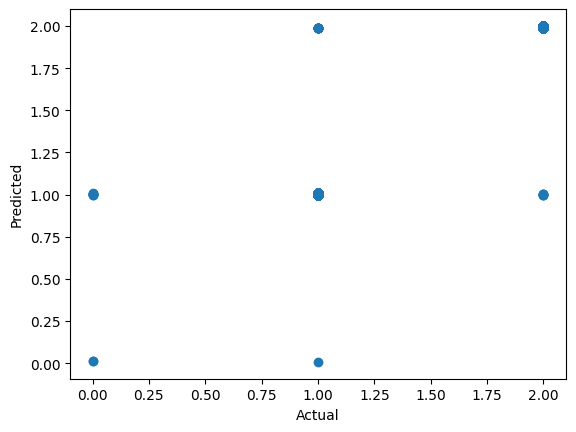

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

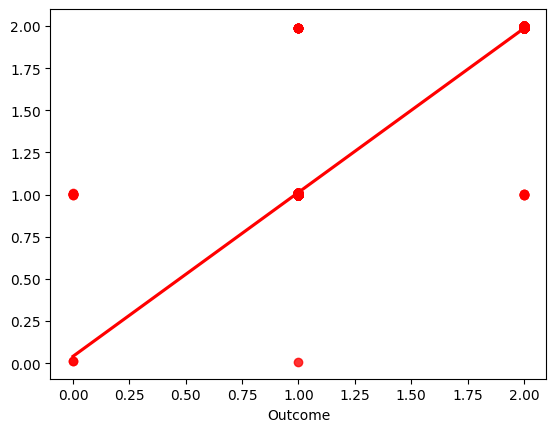

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
9352,1,1.000799,-0.000799
12408,2,1.996278,0.003722
6244,1,1.002783,-0.002783
16834,2,1.994993,0.005007
10689,1,0.997471,0.002529
...,...,...,...
10726,1,0.997349,0.002651
4021,1,1.001128,-0.001128
7163,1,1.001304,-0.001304
7457,1,1.000425,-0.000425


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_test,y_test)

DecisionTreeClassifier()

[Text(0.4554521276595745, 0.9642857142857143, 'x[0] <= 0.115\ngini = 0.496\nsamples = 4193\nvalue = [10, 2321, 1862]'),
 Text(0.20877659574468085, 0.8928571428571429, 'x[0] <= -1.889\ngini = 0.014\nsamples = 2324\nvalue = [10, 2308, 6]'),
 Text(0.13297872340425532, 0.8214285714285714, 'x[1] <= -0.015\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(0.11170212765957446, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.15425531914893617, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2845744680851064, 0.8214285714285714, 'x[1] <= -1.207\ngini = 0.012\nsamples = 2321\nvalue = [8, 2307, 6]'),
 Text(0.19680851063829788, 0.75, 'x[2] <= 1.102\ngini = 0.056\nsamples = 317\nvalue = [6, 308, 3]'),
 Text(0.13829787234042554, 0.6785714285714286, 'x[2] <= 1.101\ngini = 0.08\nsamples = 193\nvalue = [5, 185, 3]'),
 Text(0.11702127659574468, 0.6071428571428571, 'x[2] <= 1.09\ngini = 0.071\nsamples = 192\nvalue = [4, 185, 3]'),
 Text(0.06382978723404255, 0.53571428571428

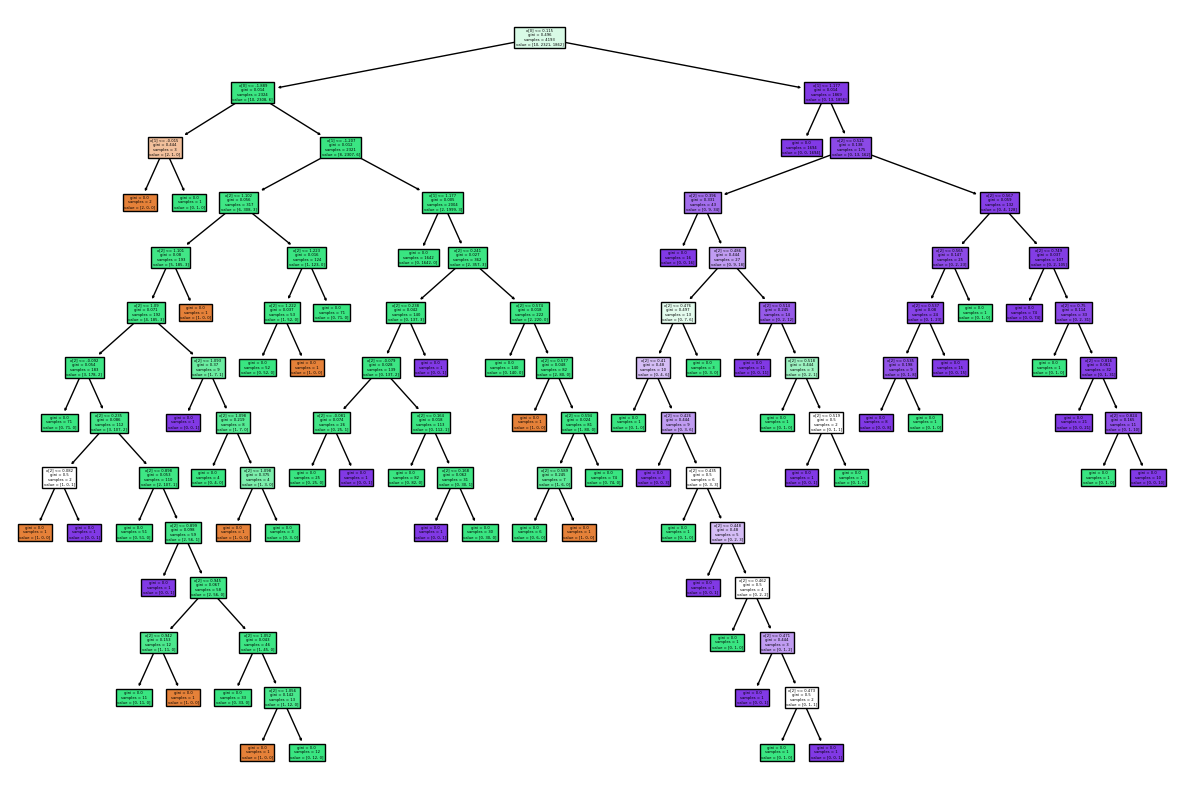

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled = True)